In [5]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set('talk')
sns.set_style('white')

In [6]:
path = pathlib.Path("data_dir/")

In [7]:
def extract_params(f):
    parts = f.name.split('_')
    params = {}
    for i in range(0, len(parts), 2):
        params[parts[i]] = float(parts[i+1])
    return params


In [8]:
data = []
for f in path.glob("rank*"):
    mrr = float((f / 'mrr.txt').read_text())
    params = extract_params(f)
    params['mrr'] = mrr
    data. append(params)
df = pd.DataFrame(data)
df.sort_values('mrr', ascending=False).head(20)

,rank,it,lambda,alpha,mrr
140,500.0,10.0,0.10000,1.0,0.767216
131,500.0,10.0,0.10000,2.0,0.725186
0,500.0,10.0,0.00000,100.0,0.678645
231,500.0,10.0,0.00001,100.0,0.677591
222,500.0,10.0,0.00100,100.0,0.665000
161,500.0,10.0,0.10000,5.0,0.664716
106,500.0,10.0,0.00000,50.0,0.663872
24,500.0,10.0,0.00001,50.0,0.663817
138,500.0,10.0,0.00100,50.0,0.653816
268,500.0,10.0,0.00000,20.0,0.637561


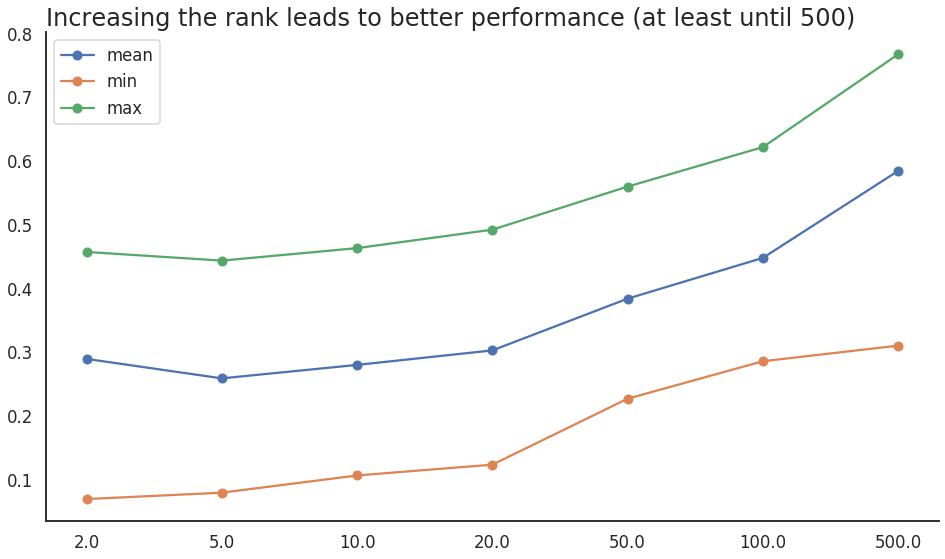

In [286]:
def plot_by_property(df, prop, title=''):
    fig, ax = plt.subplots(figsize=(16,9))
    sns.despine(fig)
    mean_by_rank = df.groupby(prop).mean()['mrr']
    min_by_rank = df.groupby(prop).min()['mrr']
    max_by_rank = df.groupby(prop).max()['mrr']
    ax.plot(np.arange(mean_by_rank.shape[0]), mean_by_rank.values, 'o-', label='mean')
    ax.plot(np.arange(mean_by_rank.shape[0]), min_by_rank.values, 'o-', label='min')
    ax.plot(np.arange(mean_by_rank.shape[0]), max_by_rank.values, 'o-', label='max')
    ax.set_xticklabels([0] + mean_by_rank.index.tolist())
    ax.legend()
    if title:
        ax.set_title(title,size =24, loc='left')
plot_by_property(df, 'rank', 'Increasing the rank leads to better performance (at least until 500)')

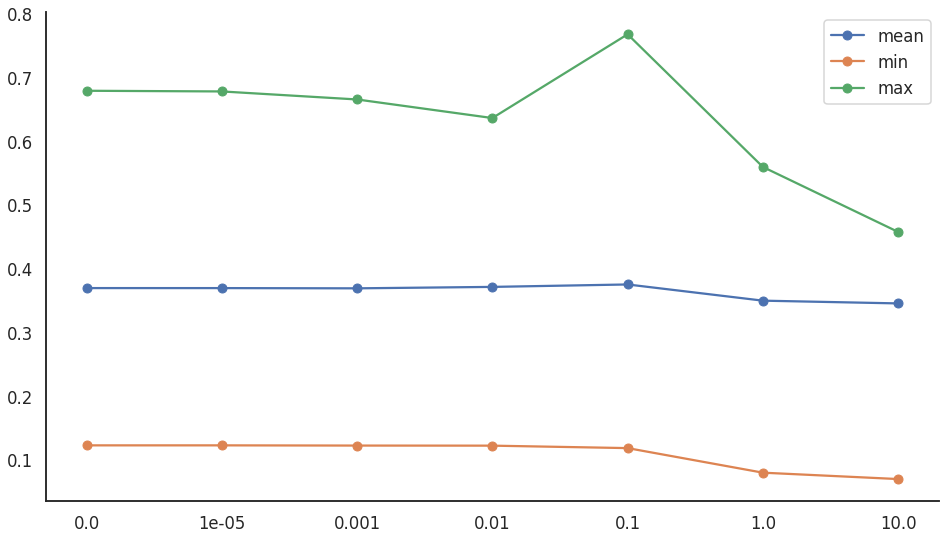

In [290]:
plot_by_property(df, 'lambda', title="")

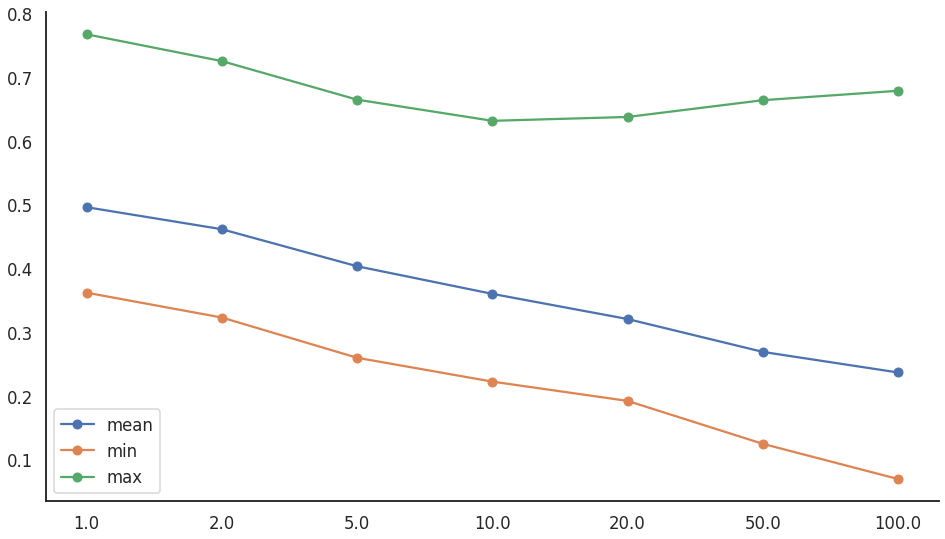

In [291]:
plot_by_property(df, 'alpha')

In [292]:
p = df.pivot_table(values='mrr', index=['lambda'], columns=['alpha'], aggfunc='mean')
p.sort_index()

alpha,1.0,2.0,5.0,10.0,20.0,50.0,100.0
lambda,,,,,,,
0.00000,0.505418,0.461526,0.400392,0.361633,0.324336,0.277409,0.253421
0.00001,0.505512,0.461567,0.400368,0.361566,0.324274,0.277400,0.253270
0.00100,0.507728,0.462894,0.401310,0.358702,0.323016,0.276400,0.251344
0.01000,0.513487,0.470175,0.410756,0.363783,0.318764,0.272876,0.247287
0.10000,0.524166,0.480251,0.416978,0.368247,0.325764,0.273324,0.235133
1.00000,0.469687,0.449410,0.399664,0.352802,0.308717,0.251185,0.214561
10.00000,0.446398,0.444570,0.394475,0.353901,0.319363,0.254787,0.202300


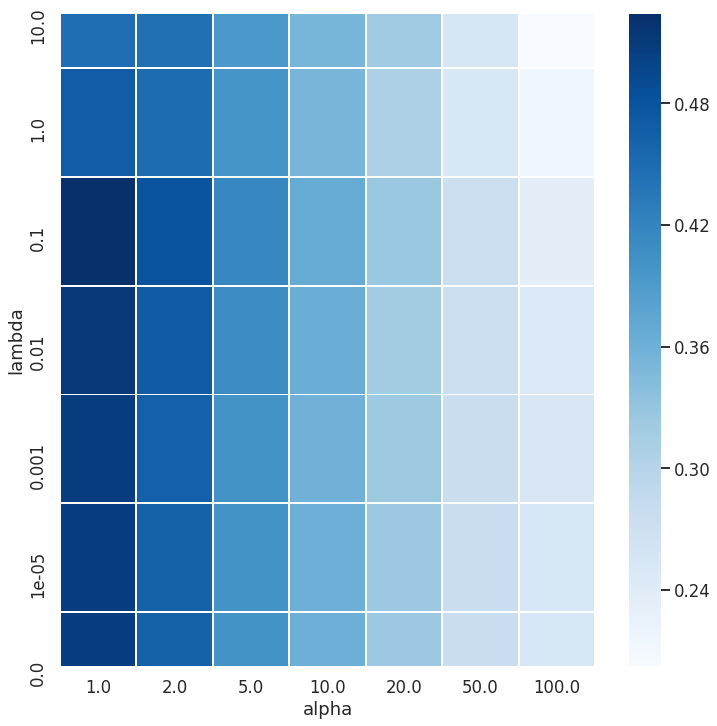

In [293]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(p.sort_index(ascending=False), cmap='Blues',linewidths=1,ax=ax)